In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('/Users/lapstore/Downloads/mnist_train.csv')
test = pd.read_csv('/Users/lapstore/Downloads/mnist_test.csv')

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [5]:
cols = train.columns

In [6]:
train[cols].isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [7]:
train.duplicated().sum()
#The data is already clean

0

In [8]:
train_labels = train.iloc[:, 0].values
train_images = train.iloc[:, 1:].values
test_labels = test.iloc[:, 0].values
test_images = test.iloc[:, 1:].values

# Reshape data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Normalize Data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [9]:
# Second Task - Artificial Neural Network
# Build Model
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history_ann=model_ann.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.2396 - accuracy: 0.9298 - val_loss: 0.1476 - val_accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.1022 - accuracy: 0.9690 - val_loss: 0.0901 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.0722 - accuracy: 0.9772 - val_loss: 0.0990 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 1s 695us/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0964 - val_accuracy: 0.9705
Epoch 5/10
1875/1875 [==============================] - 1s 721us/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0870 - val_accuracy: 0.9724
Epoch 6/10
1875/1875 [==============================] - 1s 718us/step - loss: 0.0364 - accuracy: 0.9879 - val_loss: 0.0861 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0924 -

In [10]:
# Evaluate Model
test_predictions_ann = model_ann.predict(test_images)
test_predictions_ann = np.argmax(test_predictions_ann, axis=1)

accuracy_ann = accuracy_score(test_labels, test_predictions_ann)
precision_ann = precision_score(test_labels, test_predictions_ann, average='macro')
recall_ann = recall_score(test_labels, test_predictions_ann, average='macro')
f1_ann = f1_score(test_labels, test_predictions_ann, average='macro')

print('Artificial Neural Network Metrics')
print('Accuracy:', accuracy_ann)
print('Precision:', precision_ann)
print('Recall:', recall_ann)
print('F1-Score:', f1_ann)

313/313 [==============================] - 0s 351us/step
Artificial Neural Network Metrics
Accuracy: 0.9745
Precision: 0.9748410796763771
Recall: 0.9741880235434559
F1-Score: 0.9743503215953998


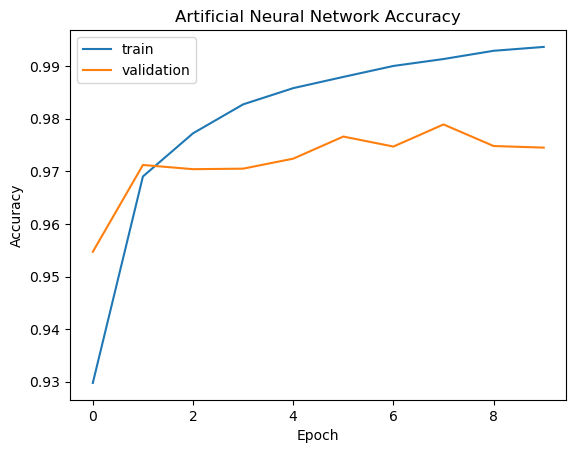

In [11]:
# Visualize ANN Performance
plt.plot(history_ann.history['accuracy'], label='train')
plt.plot(history_ann.history['val_accuracy'], label='validation')
plt.title('Artificial Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Third Task - Convolutional Neural Network
# Build Model
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history_cnn=model_cnn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1426 - accuracy: 0.9564 - val_loss: 0.0497 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0494 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0327 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0313 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0311 - val_ac

In [13]:
# Evaluate Model
test_predictions_cnn = model_cnn.predict(test_images)
test_predictions_cnn = np.argmax(test_predictions_cnn, axis=1)

accuracy_cnn = accuracy_score(test_labels, test_predictions_cnn)
precision_cnn = precision_score(test_labels, test_predictions_cnn, average='macro')
recall_cnn = recall_score(test_labels, test_predictions_cnn, average='macro')
f1_cnn = f1_score(test_labels, test_predictions_cnn, average='macro')

print('Convolutional Neural Network Metrics')
print('Accuracy:', accuracy_cnn)
print('Precision:', precision_cnn)
print('Recall:', recall_cnn)
print('Convolutional Neural Network Metrics')
print('F1-Score:', f1_cnn)

313/313 [==============================] - 1s 2ms/step
Convolutional Neural Network Metrics
Accuracy: 0.9867
Precision: 0.9868773246019547
Recall: 0.9868282345635911
Convolutional Neural Network Metrics
F1-Score: 0.986768799698409


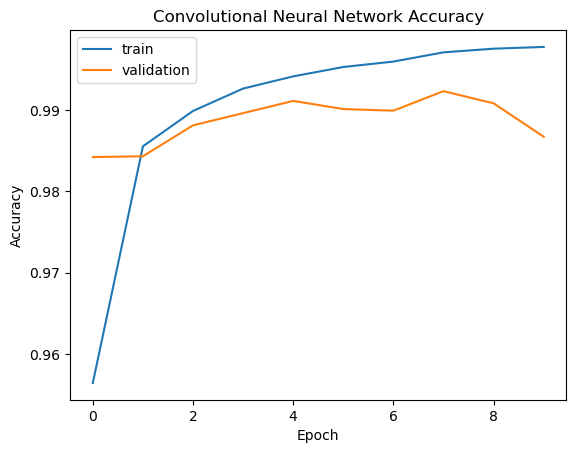

In [14]:
# Visualize CNN Performance
plt.plot(history_cnn.history['accuracy'], label='train')
plt.plot(history_cnn.history['val_accuracy'], label='validation')
plt.title('Convolutional Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Compare Results
print('Comparing Results: ')
print('Accuracy ANN:', accuracy_ann)
print('Accuracy CNN:', accuracy_cnn)

Comparing Results: 
Accuracy ANN: 0.9745
Accuracy CNN: 0.9867
